In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

palette = "Dark2"
%matplotlib inline

# Load Data

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('../data/final.csv')

In [4]:
for column in df.columns:
    if df[column].dtype == type(object):
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])

In [5]:
X = df[['S1_DEM_RATIO','S2_DEM_RATIO', 'S3_DEM_RATIO', 'S1_REP_RATIO', 'S2_REP_RATIO', 'S3_REP_RATIO']]
y = df.WINNER

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# Decision Tree With Less Features

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
kwargs_regularize = {'min_samples_split': 8}
dt = DecisionTreeClassifier(**kwargs_regularize)
dt.fit(X_train, y_train)

TypeError: __init__() got an unexpected keyword argument 'fit_intercept'

In [32]:
dt.score(X_test, y_test)

0.8

In [10]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [23]:
dt = DecisionTreeClassifier()
param_grid = {'min_samples_split': range(2,15)}
rf_cv = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)
rf_cv.fit(X_train, y_train)
print(rf_cv.best_params_)
print(rf_cv.best_estimator_)
print(rf_cv.score(X_test, y_test))

{'min_samples_split': 8}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=8,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
0.8


/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# Fit Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

In [14]:
rf = RandomForestClassifier(oob_score=True, random_state=2)
rf.fit(X_train, y_train)
print(rf.score(X_test, y_test))

for i in range(len(rf.feature_importances_)):
    print(list(X.columns)[i], rf.feature_importances_[i])

0.7
S1_DEM_RATIO 0.10524295471826475
S2_DEM_RATIO 0.1734023334743911
S3_DEM_RATIO 0.20784041248764767
S1_REP_RATIO 0.33741838475108327
S2_REP_RATIO 0.1209028056929597
S3_REP_RATIO 0.05519310887565356


In [15]:
rf = RandomForestClassifier(oob_score=True, random_state=42, max_leaf_nodes=4)

param_grid = {'max_leaf_nodes': range(2, 6)}
rf_cv = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
rf_cv.fit(X_train, y_train)
print(rf_cv.best_params_)
print(rf_cv.best_estimator_)
print(rf_cv.score(X_test, y_test))

{'max_leaf_nodes': 5}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=5,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=True, random_state=42, verbose=0, warm_start=False)
0.8


/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [16]:
ensemble_clfs = [
    ("RF, none'",
        RandomForestClassifier(warm_start=True, 
                               oob_score=True)),
    ("RF, 5",
        RandomForestClassifier(warm_start=True,
                               oob_score=True,
                               random_state=123,
                                max_depth=5)),
    ("RF, 6",
        RandomForestClassifier(warm_start=True,
                               oob_score=True,
                               random_state=123,
                              max_depth=6))]

In [17]:
from collections import OrderedDict

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 175

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

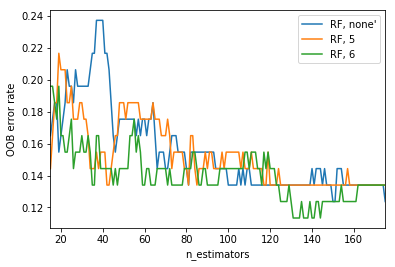

In [18]:
# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items(): 
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

# Random Stuff

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.7